# Schizophrenia and Bipolar Disorder Classification

## Problem Statement:

Use ML tools to classify between Schizophrenia and Bipolar Disorder using the dataset in Dataset folder on your google drive.

The dataset is in the form of a pickle file (dictionary file). It has 6 feature keys - ALFF, fALFF, .... - and for each feature, 14 different atlas keys - AAL, Power, .....

For your task, you'll be using only the ReHo feature key, and its 14 corresponding atlas keys to classify between Schizophrenia and Bipolar Disorder with >70% accuracy.

#### *Cannot upload the dataset

## Approach:
1. get required data in csv format
2. perform exploratory data analysis
3. dataset has 2390 features and 86 samples
4. perform ols on data
4. perform some sort of dimensionality reduction
5. perform ols on data, check if r-squared is reducing
6. perform ols on scaled data
7. putting all features into a fully connected neural network to predict
8. extra work or new approach is attention network for classification
9. show classification reports, ROC curve and precision, recall, f1-score
10. interpretation of all


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')

In [2]:
df.head(1)

,Group_Code,UIC_No,diag_label,diag_Code,sub_idx,aal-0,aal-1,aal-2,aal-3,aal-4,...,smith70-60.5,smith70-61.5,smith70-62.5,smith70-63.5,smith70-64.5,smith70-65.5,smith70-66.5,smith70-67.5,smith70-68.5,smith70-69.5
0,sub-50004,sub-50004,schizophrenia,0,0,0.903504,-1.379881,1.815419,0.69268,3.21953,...,0.742295,-2.176832,0.037749,1.221252,-0.051657,1.360693,-0.410199,1.106303,0.319606,-0.56335


#### diag_code is the output variable
diag_code = 0 => schizophrenia

diag_code = 1 => bipolar disorder

In [3]:
X = df.iloc[:,5:] # training data
y = df['diag_Code']  # labels

In [344]:
dataset = X.join(y, how="inner")

In [5]:
import statsmodels.api as sta

In [7]:
model = sta.OLS(y, X.iloc[:,0:50].values)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diag_Code   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                 -0.657
Method:                 Least Squares   F-statistic:                    0.3103
Date:                Thu, 11 Jun 2020   Prob (F-statistic):               1.00
Time:                        23:00:09   Log-Likelihood:                -76.536
No. Observations:                  87   AIC:                             253.1
Df Residuals:                      37   BIC:                             376.4
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0883      0.178      0.496      0.6

### Note:

The OLS results show that even 10 to 80 features from one dictionary 'aal' (1 type of features) are not enough to understand variability of the data.

#### observations:

r-squared= 22.2% but adjusted r-squared is negative. 

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). 

A low p-value (< 0.05) indicates that you can reject the null hypothesis.

Features with p-value < 0.15 should be included in the model. 

In [7]:
from sklearn.decomposition import PCA,KernelPCA, FactorAnalysis, DictionaryLearning

In [8]:
pca_SBD = PCA(n_components=4)
principalComponents = pca_SBD.fit_transform(X)
pca_df = pd.DataFrame(principalComponents, columns=['PC1', 'PC2', 'PC3', 'PC4'])


In [9]:
model = sta.OLS(y, pca_df.values)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diag_Code   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.543
Date:                Thu, 11 Jun 2020   Prob (F-statistic):              0.197
Time:                        22:48:29   Log-Likelihood:                -88.648
No. Observations:                  87   AIC:                             185.3
Df Residuals:                      83   BIC:                             195.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0002      0.004      0.042      0.9

#### PCA gives us features that are a combination of other features

It can be seen that 4 features cannot explain more than 2% variability in data.

Now we load PCA to contain 90 percent of data information. 

In [10]:
pca_SBD = PCA(0.9)
principalComponents = pca_SBD.fit_transform(X)
pca_df = pd.DataFrame(principalComponents)
print(pca_df.shape)

model = sta.OLS(y, pca_df.values)

results = model.fit()

print(results.summary())

(87, 52)
                            OLS Regression Results                            
Dep. Variable:              diag_Code   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                 -0.535
Method:                 Least Squares   F-statistic:                    0.4166
Date:                Thu, 11 Jun 2020   Prob (F-statistic):              0.998
Time:                        22:48:30   Log-Likelihood:                -70.812
No. Observations:                  87   AIC:                             245.6
Df Residuals:                      35   BIC:                             373.9
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0002      0.005      0.034

<Figure size 432x288 with 0 Axes>

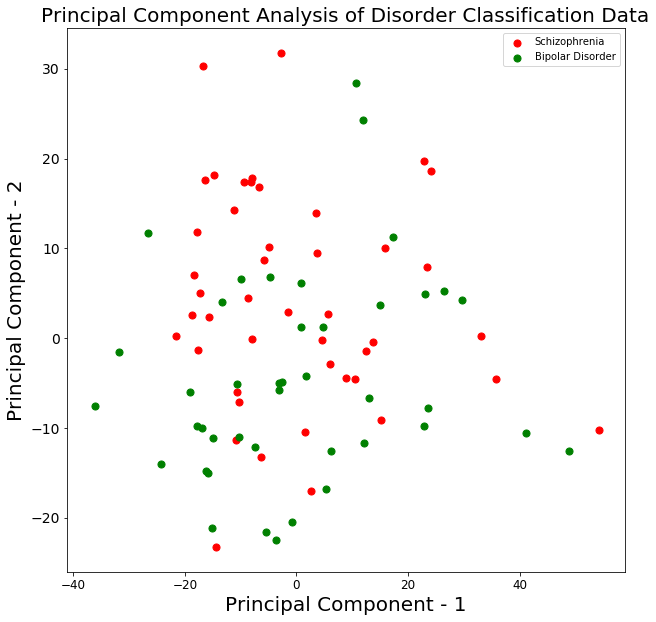

In [13]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Disorder Classification Data",fontsize=20)


classes = ['Schizophrenia', 'Bipolar Disorder']
targets = [0, 1]
colors = ['r', 'g']

df_graph = pca_df.iloc[:,0:2]
cols = df_graph.columns
y_graph = y.reset_index(drop = 'index')

for target, color in zip(targets,colors):
    indicesToKeep = y_graph == target
    plt.scatter(df_graph.loc[indicesToKeep, cols[0]],
                df_graph.loc[indicesToKeep, cols[1]], c = color, s = 50)
    

plt.legend(labels=classes)
plt.show()



### Note: 

This means that the 53 features also fail to explain the variability above 19% but adjusted r-square shows that the number of features are very high. 

In [14]:
pca_SBD = PCA(n_components=30)
principalComponents = pca_SBD.fit_transform(X)
pca_df = pd.DataFrame(principalComponents)

model = sta.OLS(y, pca_df.values)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diag_Code   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                 -0.143
Method:                 Least Squares   F-statistic:                    0.6381
Date:                Thu, 11 Jun 2020   Prob (F-statistic):              0.908
Time:                        22:49:05   Log-Likelihood:                -79.174
No. Observations:                  87   AIC:                             218.3
Df Residuals:                      57   BIC:                             292.3
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0002      0.005      0.039      0.9

<Figure size 432x288 with 0 Axes>

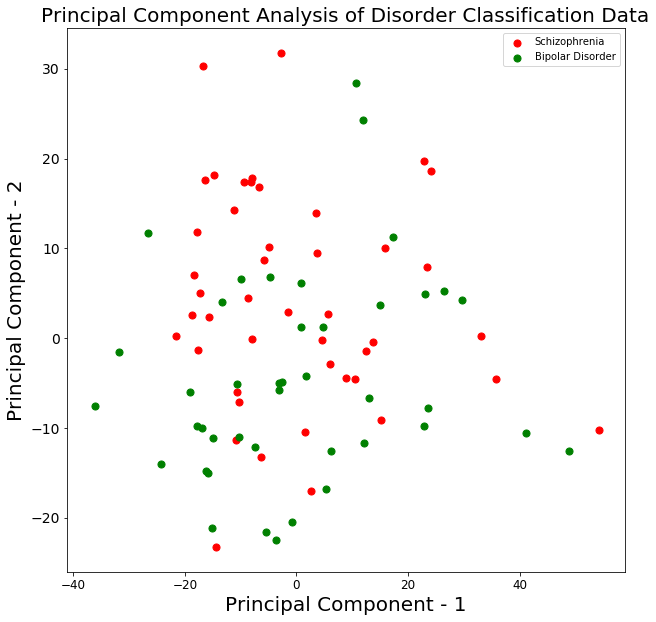

In [16]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Disorder Classification Data",fontsize=20)


classes = ['Schizophrenia', 'Bipolar Disorder']
targets = [0, 1]
colors = ['r', 'g']

df_graph = pca_df.iloc[:,0:2]
cols = df_graph.columns
y_graph = y.reset_index(drop = 'index')

for target, color in zip(targets,colors):
    indicesToKeep = y_graph == target
    plt.scatter(df_graph.loc[indicesToKeep, cols[0]],
                df_graph.loc[indicesToKeep, cols[1]], c = color, s = 50)
    

plt.legend(labels=classes)
plt.show()


# Auto-encoders for dimensionality reduction

Auto Encoders are is a type of artificial neural network used to learn efficient data patterns in an unsupervised manner. An Auto Encoder ideally consists of an encoder and decoder.

The Neural Network is designed compress data using the Encoding level. The Decoder will try to uncompress the data to the original dimension.



In [17]:
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adagrad, Adadelta, Adagrad, Adamax, SGD
from keras.losses import binary_crossentropy
from keras import callbacks

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])

In [18]:
X_scaled = minmax_scale(X, axis = 0)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.9, random_state = 42)

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Autoencoder model

Now we begin creating an Autoencoder Model with input shape same as number of features(=2390) and encoding dimension of our choice (=10). 

1. Create 'Input' layer with input shape 2390
2. Then add as many 'Dense' layers as you want (I have used 3 layers), the shape of these layers will decrease gradually (500, 100, 50, ...) and activation function 'relu'

3. create 'Dense' layer of the required encoding dimension. 

4. Then add as many 'Dense' layers as you want (I have used 3 layers), the shape of these layers will increase gradually (..., 50, 100, 500) and activation function 'relu'

5. Finally add output layer with sigmoid activation. 

6. when compiling model set the optimizer to adadelta as adagrad, adam, sgd yield bad results. This means either model doesn't get trained (takes a long time to train) or model doesn't generalize at all. 

In [20]:
### Define the encoder dimension
encoding_dim = 10

# define the number of features
ncol = X.shape[1]

# Input Layer
input_layer = Input(shape = (ncol, ))

# Encoder Layers 
encode1 = Dense(500, activation = 'relu')(input_layer)
encode2 = Dense(100, activation = 'relu')(encode1)
encode3 = Dense(50, activation = 'relu')(encode2)

# mid-layer
mid = Dense(encoding_dim, activation = 'relu')(encode3)

# Decoder Layers
decode1 = Dense(50, activation = 'relu')(mid)
decode2 = Dense(100, activation = 'relu')(decode1)
decode3 = Dense(500, activation = 'relu')(decode2)

# Output Layer
output_layer = Dense(ncol, activation = 'sigmoid')(decode3)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_layer, outputs = output_layer)

sgd = SGD(lr=0.01, momentum=0.8)

# Callback
my_callbacks = [
    callbacks.EarlyStopping(patience=2),
    callbacks.ModelCheckpoint(filepath='model-{epoch:02d}-{val_loss:.2f}.h5',
                              monitor= "val_loss",
                              save_weights_only=True,
                              mode='max',
                              save_best_only=True
                             ),
    callbacks.TensorBoard(log_dir='./logs/baseline_model/'),
]

# Compile the Model
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics=['accuracy'])

In [21]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2390)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1195500   
_________________________________________________________________
dense_2 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_5 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_6 (Dense)              (None, 100)               5100      
__________

In [112]:
d = autoencoder.fit(X_train, X_train, nb_epoch = 200, batch_size = 32, shuffle = True, validation_split=0.3, callbacks=my_callbacks)

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 54 samples, validate on 24 samples
Epoch 1/200
54/54 [==============================] - 0s 9ms/step - loss: 0.6932 - acc: 0.0109 - val_loss: 0.6931 - val_acc: 0.0102
Epoch 2/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6932 - acc: 0.0108 - val_loss: 0.6931 - val_acc: 0.0102
Epoch 3/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6931 - acc: 0.0109 - val_loss: 0.6931 - val_acc: 0.0103
Epoch 4/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6931 - acc: 0.0109 - val_loss: 0.6931 - val_acc: 0.0103
Epoch 5/200
54/54 [==============================] - 0s 4ms/step - loss: 0.6931 - acc: 0.0109 - val_loss: 0.6931 - val_acc: 0.0104
Epoch 6/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6931 - acc: 0.0109 - val_loss: 0.6931 - val_acc: 0.0104
Epoch 7/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6931 - acc: 0.0108 - val_loss: 0.6931 - val_acc: 0.0104
Epoch 8/200
54/54 [====================

Epoch 63/200
54/54 [==============================] - 0s 4ms/step - loss: 0.6924 - acc: 0.0107 - val_loss: 0.6924 - val_acc: 0.0100
Epoch 64/200
54/54 [==============================] - 0s 4ms/step - loss: 0.6924 - acc: 0.0107 - val_loss: 0.6924 - val_acc: 0.0101
Epoch 65/200
54/54 [==============================] - 0s 4ms/step - loss: 0.6924 - acc: 0.0107 - val_loss: 0.6924 - val_acc: 0.0101
Epoch 66/200
54/54 [==============================] - 0s 4ms/step - loss: 0.6923 - acc: 0.0106 - val_loss: 0.6924 - val_acc: 0.0101
Epoch 67/200
54/54 [==============================] - 0s 4ms/step - loss: 0.6923 - acc: 0.0107 - val_loss: 0.6923 - val_acc: 0.0101
Epoch 68/200
54/54 [==============================] - 0s 4ms/step - loss: 0.6923 - acc: 0.0107 - val_loss: 0.6923 - val_acc: 0.0101
Epoch 69/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6923 - acc: 0.0107 - val_loss: 0.6923 - val_acc: 0.0101
Epoch 70/200
54/54 [==============================] - 0s 3ms/step - loss: 0.

Epoch 125/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6851 - acc: 0.0106 - val_loss: 0.6853 - val_acc: 0.0103
Epoch 126/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6848 - acc: 0.0106 - val_loss: 0.6850 - val_acc: 0.0103
Epoch 127/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6845 - acc: 0.0106 - val_loss: 0.6847 - val_acc: 0.0103
Epoch 128/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6841 - acc: 0.0106 - val_loss: 0.6844 - val_acc: 0.0103
Epoch 129/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6838 - acc: 0.0106 - val_loss: 0.6841 - val_acc: 0.0103
Epoch 130/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6835 - acc: 0.0106 - val_loss: 0.6838 - val_acc: 0.0103
Epoch 131/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6832 - acc: 0.0106 - val_loss: 0.6835 - val_acc: 0.0104
Epoch 132/200
54/54 [==============================] - 0s 3ms/step - 

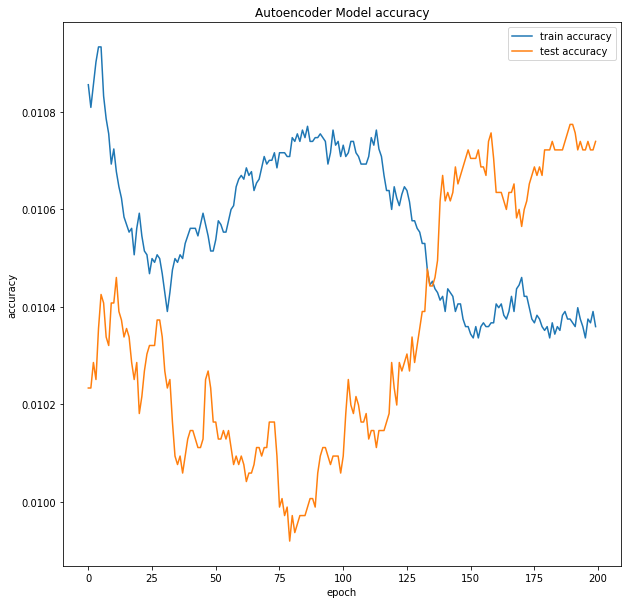

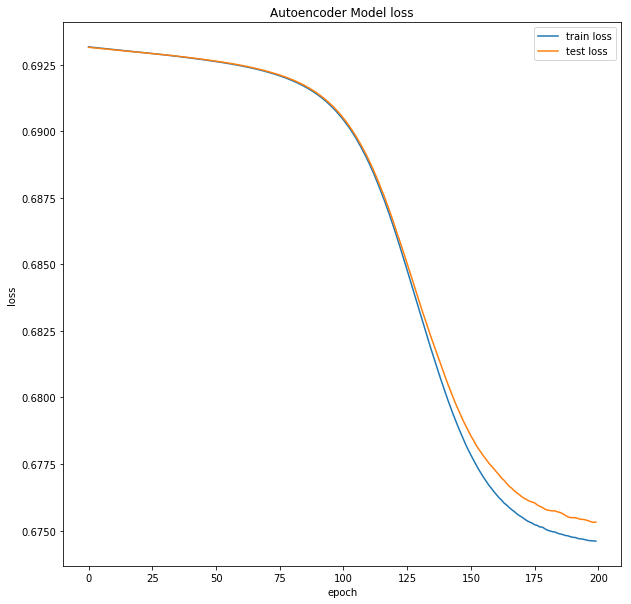

In [115]:
history = d
# summarize history for accuracy
plt.figure(figsize=(10,10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Autoencoder Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')
plt.show()

# summarize history for loss
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Autoencoder Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')
plt.show()

### Use Encoder level to reduce dimension

In [185]:
encoder = Model(inputs = input_layer, outputs = mid)
encoded_input = Input(shape = (encoding_dim, ))
encoded_train = pd.DataFrame(encoder.predict(X_train))
encoded_train = encoded_train.add_prefix('feature_')
encoded_test = pd.DataFrame(encoder.predict(X_test))
encoded_test = encoded_test.add_prefix('feature_')
encoded_train.head(1)

,feature_0,feature_1,feature_2,feature_3,feature_4
0,0.0,0.204907,1.947751,0.0,11.259007


## Observations:

There is some problem since some of the features are 0.

In [117]:
# Performing OLS on training set
model = sta.OLS(y_train, encoded_train.iloc[:].values)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diag_Code   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     17.22
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           4.16e-13
Time:                        21:04:52   Log-Likelihood:                -45.925
No. Observations:                  78   AIC:                             105.8
Df Residuals:                      71   BIC:                             122.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.7262      0.546      3.161      0.0

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1633: RuntimeWarning: divide by zero encountered in float_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<Figure size 432x288 with 0 Axes>

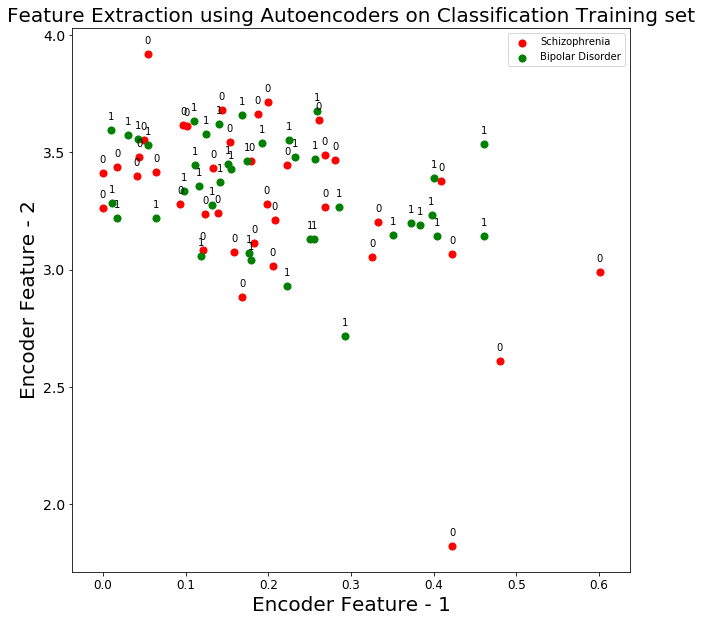

In [121]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Encoder Feature - 1',fontsize=20)
plt.ylabel('Encoder Feature - 2',fontsize=20)
plt.title("Feature Extraction using Autoencoders on Classification Training set",fontsize=20)


classes = ['Schizophrenia', 'Bipolar Disorder']
targets = [0, 1]
colors = ['r', 'g']

df_graph = encoded_train.iloc[:,0:2]
cols = df_graph.columns
y_graph = y_train.reset_index(drop = 'index')


for target, color, ind in zip(targets,colors, range(len(y_graph))):
    indicesToKeep = y_graph == target
    plt.scatter(df_graph.loc[indicesToKeep, cols[0]],
                df_graph.loc[indicesToKeep, cols[1]], c = color, s = 50)
    
df_annot = df_graph.values.tolist()     

for i, txt in enumerate(y_graph.tolist()):
    plt.annotate(str(txt), (df_annot[i][0],df_annot[i][1]), textcoords="offset points", xytext=(0,10), ha='center')
    
plt.legend(labels=classes)
plt.show()

## Observation: 

It is seen that some of the features in the encoded_X are empty. 

Does that means we can further reduce the encoding dimension?

Need to check if model performs at similar accuracy and similar performance.

## Reducing encoding dimension to 5 

In [180]:
### Define the encoder dimension
encoding_dim = 5

# define the number of features
ncol = X.shape[1]

# Input Layer
input_layer = Input(shape = (ncol, ))

# Encoder Layers 
encode1 = Dense(500, activation = 'relu')(input_layer)
encode2 = Dense(100, activation = 'relu')(encode1)
encode3 = Dense(50, activation = 'relu')(encode2)

# mid-layer
mid = Dense(encoding_dim, activation = 'relu')(encode3)

# Decoder Layers
decode1 = Dense(50, activation = 'relu')(mid)
decode2 = Dense(100, activation = 'relu')(decode1)
decode3 = Dense(500, activation = 'relu')(decode2)

# Output Layer
output_layer = Dense(ncol, activation = 'sigmoid')(decode3)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_layer, outputs = output_layer)

sgd = SGD(lr=0.01, momentum=0.8)

# Callback
my_callbacks = [
    callbacks.EarlyStopping(patience=2),
    callbacks.ModelCheckpoint(filepath='5 mid dimensions model-{epoch:02d}-{val_loss:.2f}.h5',
                              monitor= "val_loss",
                              save_weights_only=True,
                              mode='max',
                              save_best_only=True
                             ),
    callbacks.TensorBoard(log_dir='./logs/5_dim_200_epoch/', histogram_freq=1, write_grads=True),
]

# Compile the Model
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics=['accuracy'])

d = autoencoder.fit(X_train, X_train, nb_epoch = 200, batch_size = 32, shuffle = True, validation_split=0.3, callbacks=my_callbacks)

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 54 samples, validate on 24 samples
Epoch 1/200
54/54 [==============================] - 1s 10ms/step - loss: 0.6932 - acc: 0.0107 - val_loss: 0.6932 - val_acc: 0.0097
Epoch 2/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6931 - acc: 0.0107 - val_loss: 0.6931 - val_acc: 0.0098
Epoch 3/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6931 - acc: 0.0108 - val_loss: 0.6931 - val_acc: 0.0099
Epoch 4/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6931 - acc: 0.0108 - val_loss: 0.6931 - val_acc: 0.0099
Epoch 5/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6931 - acc: 0.0108 - val_loss: 0.6931 - val_acc: 0.0098
Epoch 6/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6931 - acc: 0.0107 - val_loss: 0.6931 - val_acc: 0.0099
Epoch 7/200
54/54 [==============================] - 0s 4ms/step - loss: 0.6931 - acc: 0.0108 - val_loss: 0.6931 - val_acc: 0.0099
Epoch 8/200
54/54 [===================

Epoch 63/200
54/54 [==============================] - 0s 4ms/step - loss: 0.6925 - acc: 0.0106 - val_loss: 0.6925 - val_acc: 0.0105
Epoch 64/200
54/54 [==============================] - 0s 4ms/step - loss: 0.6925 - acc: 0.0105 - val_loss: 0.6925 - val_acc: 0.0105
Epoch 65/200
54/54 [==============================] - 0s 4ms/step - loss: 0.6925 - acc: 0.0105 - val_loss: 0.6925 - val_acc: 0.0105
Epoch 66/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6925 - acc: 0.0105 - val_loss: 0.6925 - val_acc: 0.0105
Epoch 67/200
54/54 [==============================] - 0s 4ms/step - loss: 0.6924 - acc: 0.0105 - val_loss: 0.6925 - val_acc: 0.0105
Epoch 68/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6924 - acc: 0.0106 - val_loss: 0.6924 - val_acc: 0.0105
Epoch 69/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6924 - acc: 0.0106 - val_loss: 0.6924 - val_acc: 0.0105
Epoch 70/200
54/54 [==============================] - 0s 3ms/step - loss: 0.

Epoch 125/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6897 - acc: 0.0105 - val_loss: 0.6897 - val_acc: 0.0105
Epoch 126/200
54/54 [==============================] - 0s 7ms/step - loss: 0.6896 - acc: 0.0106 - val_loss: 0.6896 - val_acc: 0.0105
Epoch 127/200
54/54 [==============================] - 0s 4ms/step - loss: 0.6894 - acc: 0.0106 - val_loss: 0.6894 - val_acc: 0.0105
Epoch 128/200
54/54 [==============================] - 0s 4ms/step - loss: 0.6893 - acc: 0.0106 - val_loss: 0.6892 - val_acc: 0.0105
Epoch 129/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6891 - acc: 0.0106 - val_loss: 0.6890 - val_acc: 0.0104
Epoch 130/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6889 - acc: 0.0106 - val_loss: 0.6888 - val_acc: 0.0104
Epoch 131/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6887 - acc: 0.0106 - val_loss: 0.6886 - val_acc: 0.0104
Epoch 132/200
54/54 [==============================] - 0s 3ms/step - 

In [ ]:
history = d
# summarize history for accuracy
plt.figure(figsize=(10,10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Autoencoder Model with 5 Middle Encoding dimension accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')
plt.show()

# summarize history for loss
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Autoencoder Model with 5 Middle Encoding dimension loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')
plt.show()

#### Perform OLS

In [181]:
# looking at model output
encoder = Model(inputs = input_layer, outputs = mid)
encoded_train = pd.DataFrame(encoder.predict(X_train))
encoded_train = encoded_train.add_prefix('feature_')
encoded_test = pd.DataFrame(encoder.predict(X_test))
encoded_test = encoded_test.add_prefix('feature_')
encoded_train.head(1)

,feature_0,feature_1,feature_2,feature_3,feature_4
0,0.0,0.204907,1.947751,0.0,11.259007


# Observation:

It is found that the model accuracy decreases, and from OLS we know that the r-squared value decreases. 

Cannot understand why some of the encoded_train variables are 0.

Adding dropout layers and more number of epochs to increase r-squared.

## Increasing epochs

In [1]:
from keras.layers import Dropout
### Define the encoder dimension
encoding_dim = 10

# define the number of features
ncol = X.shape[1]

# Input Layer
input_layer = Input(shape = (ncol, ))

# Encoder Layers 
encode1 = Dense(500, activation = 'relu')(input_layer)
encode2 = Dense(100, activation = 'relu')(encode1)
#dropout1 = Dropout(0.5)(encode2)
encode3 = Dense(50, activation = 'relu')(encode2)#(dropout1)

# mid-layer
mid = Dense(encoding_dim, activation = 'relu')(encode3)

# Decoder Layers
decode1 = Dense(50, activation = 'relu')(mid)
#dropout2 = Dropout(0.5)(decode1)
decode2 = Dense(100, activation = 'relu')(decode1)#(dropout2)
decode3 = Dense(500, activation = 'relu')(decode2)

# Output Layer
output_layer = Dense(ncol, activation = 'sigmoid')(decode3)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_layer, outputs = output_layer)

sgd = SGD(lr=0.01, momentum=0.8)

# Callback
my_callbacks = [
    #callbacks.EarlyStopping(patience=2),
    callbacks.ModelCheckpoint(filepath='5 mid dimensions model-{epoch:02d}-{val_loss:.2f}.h5',
                              monitor= "val_loss",
                              save_weights_only=True,
                              mode='max',
                              save_best_only=True
                             ),
    callbacks.TensorBoard(log_dir='./logs/10_dim_1000_epoch', histogram_freq=1, write_grads=True),
]

# Compile the Model
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics=['accuracy'])

d = autoencoder.fit(X_train, X_train, nb_epoch = 200, batch_size = 32, shuffle = True, validation_split=0.3, callbacks=my_callbacks)

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])

NameError: name 'X' is not defined

In [26]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 2390)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 500)               1195500   
_________________________________________________________________
dense_18 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_19 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_21 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_22 (Dense)             (None, 100)               5100      
__________

In [ ]:
history = d
# summarize history for accuracy
plt.figure(figsize=(10,10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Autoencoder Model with 5 Middle Encoding dimension accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')
plt.show()

# summarize history for loss
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Autoencoder Model with 5 Middle Encoding dimension loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')
plt.show()

In [168]:
# looking at model output
encoder = Model(inputs = input_layer, outputs = mid)
encoded_train = pd.DataFrame(encoder.predict(X_train))
encoded_train = encoded_train.add_prefix('feature_')
encoded_test = pd.DataFrame(encoder.predict(X_test))
encoded_test = encoded_test.add_prefix('feature_')
encoded_train.head(1)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,0.0,0.0,0.0,0.246959,4.002799,1.503211,5.574015,2.097752,0.0,3.224437


#### Perform OLS

In [169]:
# Performing OLS on training set
model = sta.OLS(y_train, encoded_train.iloc[:].values)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diag_Code   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     16.79
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           5.15e-12
Time:                        21:39:15   Log-Likelihood:                -50.498
No. Observations:                  78   AIC:                             113.0
Df Residuals:                      72   BIC:                             127.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        n

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1633: RuntimeWarning: divide by zero encountered in float_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<Figure size 432x288 with 0 Axes>

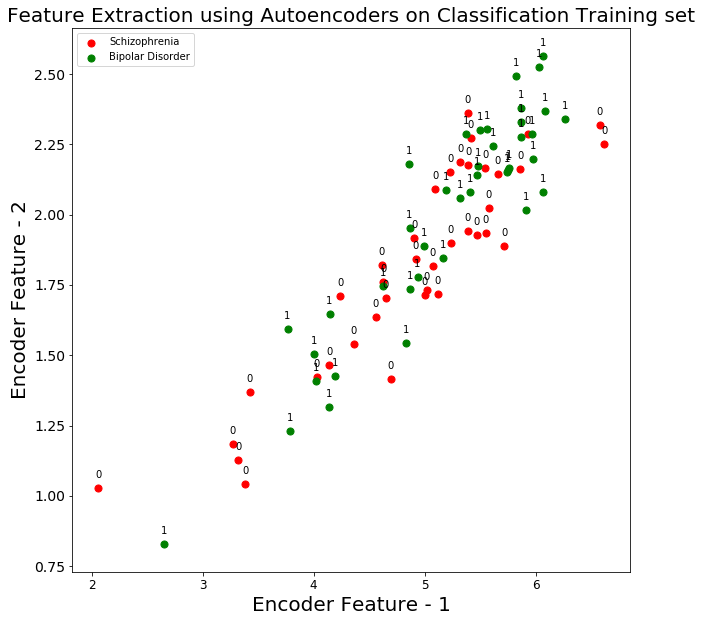

In [171]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Encoder Feature - 1',fontsize=20)
plt.ylabel('Encoder Feature - 2',fontsize=20)
plt.title("Feature Extraction using Autoencoders on Classification Training set",fontsize=20)


classes = ['Schizophrenia', 'Bipolar Disorder']
targets = [0, 1]
colors = ['r', 'g']

df_graph = encoded_train.iloc[:,4:7]
cols = df_graph.columns
y_graph = y_train.reset_index(drop = 'index')


for target, color, ind in zip(targets,colors, range(len(y_graph))):
    indicesToKeep = y_graph == target
    plt.scatter(df_graph.loc[indicesToKeep, cols[0]],
                df_graph.loc[indicesToKeep, cols[1]], c = color, s = 50)
    
df_annot = df_graph.values.tolist()     

for i, txt in enumerate(y_graph.tolist()):
    plt.annotate(str(txt), (df_annot[i][0],df_annot[i][1]), textcoords="offset points", xytext=(0,10), ha='center')
    
plt.legend(labels=classes)
plt.show()

# Observation and Aproach change

When looking at encoded_train variable, it is noticed that some features(feature_0, feature_1,feature_3 and feature_8) are showing 0 as encoded values.

This is due to the problem of *Vanishing Gradients*.

New Problem observed : Vanishing Gradients

visualization of the problem usning tensorflow

Problem Solution : add dropout layers and change activation function

In [189]:
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adagrad, Adadelta, Adagrad, Adamax, SGD
from keras.losses import binary_crossentropy
from keras import callbacks
from keras.initializers import RandomUniform


In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# note: 
X(input features) need to be scaled between 0 to 1 or -1 to 1.

Neural Networks yield quick results after feature scaling.


In [305]:
X_scaled = minmax_scale(X_train, axis = 0, feature_range=(0, 1))
X_train = X_scaled # doing this because the rest of the code is based on X_train

When using the rectified linear activation function (or ReLU for short), 
it is good practice to use the He weight initialization scheme. 

Also when using ReLU the features need to be scaled between 0 and 1.

We can define the MLP with five hidden layers using ReLU and He initialization

In [316]:
from keras.backend import clear_session
clear_session()

In [317]:
from keras.layers import Dropout
from keras.initializers import RandomUniform, he_uniform

### Define the encoder dimension
encoding_dim = 10

# define the number of features
ncol = X.shape[1]

init = RandomUniform(minval=-0.5, maxval=0.5)

# Input Layer
input_layer = Input(shape = (ncol, ))

# Encoder Layers 
encode1 = Dense(1000, activation = 'tanh', kernel_initializer=init)(input_layer)
encode2 = Dense(500, activation = 'tanh', kernel_initializer=init)(encode1)
dropout1 = Dropout(0.01)(encode2)
encode2 = Dense(100, activation = 'tanh', kernel_initializer=init)(dropout1)
dropout2 = Dropout(0.01)(encode2)
encode3 = Dense(50, activation = 'tanh', kernel_initializer=init)(dropout2)

# mid-layer
mid = Dense(encoding_dim, activation = 'tanh')(encode3)

# Decoder Layers
decode1 = Dense(50, activation = 'tanh', kernel_initializer=init)(mid)
dropout3 = Dropout(0.01)(decode1)
decode2 = Dense(100, activation = 'tanh', kernel_initializer=init)(dropout3)
dropout4 = Dropout(0.01)(decode2)
decode3 = Dense(500, activation = 'tanh', kernel_initializer=init)(dropout4)
decode4 = Dense(1000, activation = 'tanh', kernel_initializer=init)(decode3)

# Output Layer
output_layer = Dense(ncol, activation = 'tanh')(decode4)

# Combine Encoder and Deocder layers and define model
#autoencoder = Sequential()
#initializer = tf.keras.initializers.RandomUniform(minval=0.3, maxval=0.7)

autoencoder = Model(inputs = input_layer, outputs = output_layer)

sgd = SGD(lr=0.01, momentum=0.8)

# Callback
my_callbacks = [
    callbacks.ModelCheckpoint(filepath='deep model-{epoch:02d}-{val_loss:.2f}.h5',
                              monitor= "val_loss",
                              save_weights_only=True,
                              mode='max',
                              save_best_only=True
                             ),
    callbacks.TensorBoard(log_dir='./logs/deep_100_epoch/', histogram_freq=1, write_grads=True),
]

# Compile the Model
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics=['accuracy'])

print("Model Compiled!!!")

d = autoencoder.fit(X_train, X_train, epochs = 100, batch_size = 32, shuffle = True, validation_split=0.3, callbacks=my_callbacks)

Model Compiled!!!
Train on 48 samples, validate on 21 samples
Epoch 1/100
48/48 [==============================] - 2s 33ms/step - loss: 4.0121 - acc: 0.0114 - val_loss: 3.5876 - val_acc: 0.0124
Epoch 2/100
48/48 [==============================] - 0s 9ms/step - loss: 3.5262 - acc: 0.0117 - val_loss: 3.1957 - val_acc: 0.0129
Epoch 3/100
48/48 [==============================] - 0s 7ms/step - loss: 3.1004 - acc: 0.0122 - val_loss: 2.8901 - val_acc: 0.0131
Epoch 4/100
48/48 [==============================] - 0s 8ms/step - loss: 2.8311 - acc: 0.0124 - val_loss: 2.0003 - val_acc: 0.0134
Epoch 5/100
48/48 [==============================] - 0s 10ms/step - loss: 1.9523 - acc: 0.0134 - val_loss: 1.6477 - val_acc: 0.0135
Epoch 6/100
48/48 [==============================] - 0s 8ms/step - loss: 1.6254 - acc: 0.0136 - val_loss: 1.3525 - val_acc: 0.0137
Epoch 7/100
48/48 [==============================] - 0s 8ms/step - loss: 1.3787 - acc: 0.0138 - val_loss: 1.2207 - val_acc: 0.0136
Epoch 8/100
48/48 [

48/48 [==============================] - 0s 9ms/step - loss: 0.7885 - acc: 0.0134 - val_loss: 0.7807 - val_acc: 0.0141
Epoch 63/100
48/48 [==============================] - 0s 10ms/step - loss: 0.7838 - acc: 0.0145 - val_loss: 0.7780 - val_acc: 0.0154
Epoch 64/100
48/48 [==============================] - 0s 8ms/step - loss: 0.7836 - acc: 0.0142 - val_loss: 0.7775 - val_acc: 0.0151
Epoch 65/100
48/48 [==============================] - 0s 8ms/step - loss: 0.7823 - acc: 0.0137 - val_loss: 0.7830 - val_acc: 0.0135
Epoch 66/100
48/48 [==============================] - 0s 9ms/step - loss: 0.7851 - acc: 0.0142 - val_loss: 0.7838 - val_acc: 0.0129
Epoch 67/100
48/48 [==============================] - 0s 8ms/step - loss: 0.7907 - acc: 0.0144 - val_loss: 0.7823 - val_acc: 0.0134
Epoch 68/100
48/48 [==============================] - 0s 9ms/step - loss: 0.7885 - acc: 0.0144 - val_loss: 0.7825 - val_acc: 0.0130
Epoch 69/100
48/48 [==============================] - 1s 11ms/step - loss: 0.7819 - acc:

In [318]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2390)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              2391000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               50100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
__________

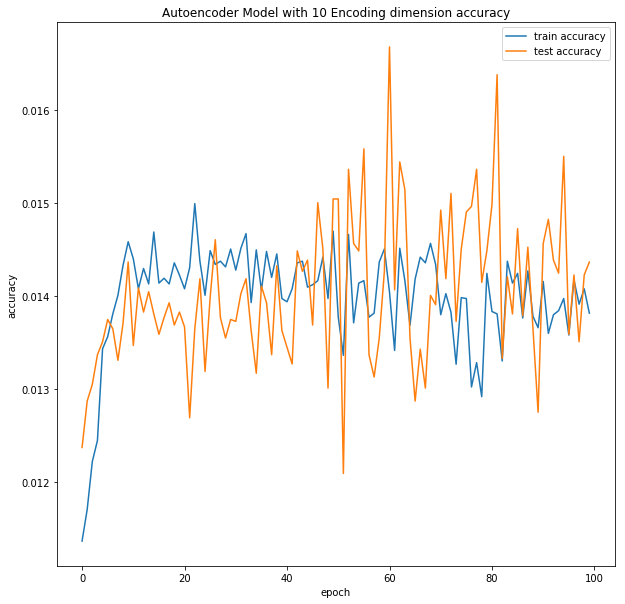

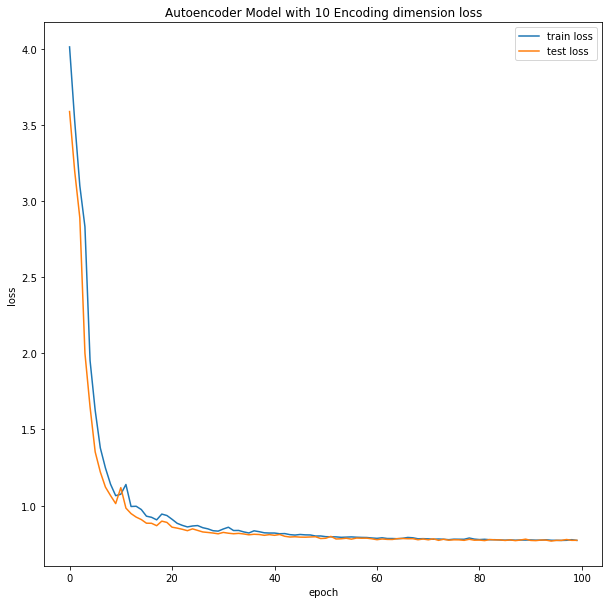

In [319]:
history = d
# summarize history for accuracy
plt.figure(figsize=(10,10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Autoencoder Model with 10 Encoding dimension accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')
plt.show()

# summarize history for loss
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Autoencoder Model with 10 Encoding dimension loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')
plt.show()

In [320]:
# looking at model output
encoder = Model(inputs = input_layer, outputs = mid)

encoded_train = pd.DataFrame(encoder.predict(X_train))
encoded_train = encoded_train.add_prefix('feature_')

encoded_train.head(1)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,-0.898566,-0.616781,0.192092,-0.978011,0.944101,-0.879987,-0.979606,-0.996983,0.69558,-0.860505


#### Perform OLS

In [321]:
# Performing OLS on training set
model = sta.OLS(y_train, encoded_train.iloc[:].values)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diag_Code   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     6.442
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           1.28e-06
Time:                        02:35:05   Log-Likelihood:                -45.934
No. Observations:                  69   AIC:                             111.9
Df Residuals:                      59   BIC:                             134.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5491      1.212      0.453      0.6

<Figure size 432x288 with 0 Axes>

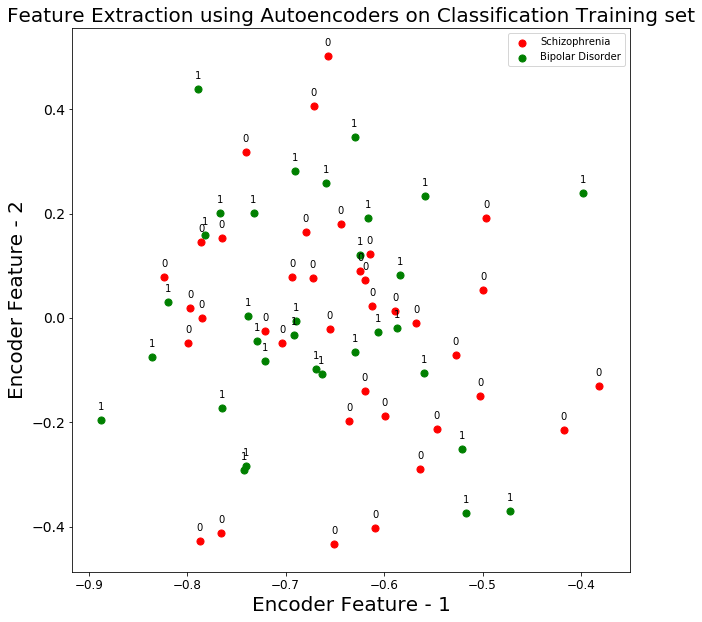

In [322]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Encoder Feature - 1',fontsize=20)
plt.ylabel('Encoder Feature - 2',fontsize=20)
plt.title("Feature Extraction using Autoencoders on Classification Training set",fontsize=20)


classes = ['Schizophrenia', 'Bipolar Disorder']
targets = [0, 1]
colors = ['r', 'g']

df_graph = encoded_train.iloc[:,1:10]
cols = df_graph.columns
y_graph = y_train.reset_index(drop = 'index')


for target, color, ind in zip(targets,colors, range(len(y_graph))):
    indicesToKeep = y_graph == target
    plt.scatter(df_graph.loc[indicesToKeep, cols[0]],
                df_graph.loc[indicesToKeep, cols[1]], c = color, s = 50)
    
df_annot = df_graph.values.tolist()     

for i, txt in enumerate(y_graph.tolist()):
    plt.annotate(str(txt), (df_annot[i][0],df_annot[i][1]), textcoords="offset points", xytext=(0,10), ha='center')
    
plt.legend(labels=classes)
plt.show()

In [323]:
# preprocessing the X_test
X_scaled = minmax_scale(X_test, axis = 0, feature_range=(0, 1))
X_test = X_scaled
encoded_test = pd.DataFrame(encoder.predict(X_test))
encoded_test = encoded_test.add_prefix('feature_')

## Create Classifier

using a Logistic Classifier


In [324]:
from sklearn.linear_model import LogisticRegression, LinearRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score,classification_report, accuracy_score, roc_curve, roc_auc_score, auc

lr = LinearRegression()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



lr = LogisticRegression()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))

lr = LogisticRegressionCV()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[[1 7]
 [2 8]]
                  precision    recall  f1-score   support

   Schizophrenia       0.33      0.12      0.18         8
Bipolar Disorder       0.53      0.80      0.64        10

       micro avg       0.50      0.50      0.50        18
       macro avg       0.43      0.46      0.41        18
    weighted avg       0.44      0.50      0.44        18

Accuracy Score:  0.5


 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
[[6 2]
 [8 2]]
                  precision    recall  f1-score   support

   Schizophrenia       0.43      0.75      0.55         8
Bipolar Disorder       0.50      0.20      0.29        10

       micro avg       0.44      0.44      0.44        18
     

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)




 LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)
[[6 2]
 [8 2]]
                  precision    recall  f1-score   support

   Schizophrenia       0.43      0.75      0.55         8
Bipolar Disorder       0.50      0.20      0.29        10

       micro avg       0.44      0.44      0.44        18
       macro avg       0.46      0.47      0.42        18
    weighted avg       0.47      0.44      0.40        18

Accuracy Score:  0.4444444444444444


In [329]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
clf = dt.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
clf = rf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



from sklearn.ensemble import GradientBoostingClassifier
lr = GradientBoostingClassifier()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
[[4 4]
 [7 3]]
                  precision    recall  f1-score   support

   Schizophrenia       0.36      0.50      0.42         8
Bipolar Disorder       0.43      0.30      0.35        10

       micro avg       0.39      0.39      0.39        18
       macro avg       0.40      0.40      0.39        18
    weighted avg       0.40      0.39      0.38        18

Accuracy Score:  0.3888888888888889


 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
[[8 0]
 [5 5]]
                  precision    recall  f1-score   support

   Schizophrenia       0.62      1.00      0.76         8
Bipolar Disorder       1.00      0.50      0.67        10

       micro avg       0.72

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)




 GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
[[4 4]
 [7 3]]
                  precision    recall  f1-score   support

   Schizophrenia       0.36      0.50      0.42         8
Bipolar Disorder       0.43      0.30      0.35        10

       micro avg       0.39      0.39      0.39        18
       macro avg       0.40      0.40      0.39        18
    weighted avg       0.40      0.39      0.38        18

Accuracy Score:  0.3888888888888889


In [331]:
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering

lr = KMeans()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))

lr = AgglomerativeClustering()
clf = lr.fit(X_train, y_train)
y_hat = clf.fit_predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))

lr = SpectralClustering()
clf = lr.fit(X_train, y_train)
y_hat = clf.fit_predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
[[1 7]
 [3 7]]
                  precision    recall  f1-score   support

   Schizophrenia       0.25      0.12      0.17         8
Bipolar Disorder       0.50      0.70      0.58        10

       micro avg       0.44      0.44      0.44        18
       macro avg       0.38      0.41      0.38        18
    weighted avg       0.39      0.44      0.40        18

Accuracy Score:  0.4444444444444444


 AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func='deprecated')
[[2 6]
 [6 4]]
                  precision    recall  f1-score   support

   Schizophrenia       0.25      0.25      0.25         8
Bipolar Disorder       0.40      0.40      0.40        10

       micro avg       0.33  

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  n_init=n_init)


In [333]:
from sklearn.neighbors import KNeighborsClassifier
lr = KNeighborsClassifier()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))




 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
[[6 2]
 [5 5]]
                  precision    recall  f1-score   support

   Schizophrenia       0.55      0.75      0.63         8
Bipolar Disorder       0.71      0.50      0.59        10

       micro avg       0.61      0.61      0.61        18
       macro avg       0.63      0.62      0.61        18
    weighted avg       0.64      0.61      0.61        18

Accuracy Score:  0.6111111111111112


In [335]:
# looking at model output
encoder = Model(inputs = input_layer, outputs = mid)

encoded_train = pd.DataFrame(encoder.predict(X_train))
encoded_train = encoded_train.add_prefix('feature_')

encoded_train.head(1)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,-0.898566,-0.616781,0.192092,-0.978011,0.944101,-0.879987,-0.979606,-0.996983,0.69558,-0.860505


In [336]:
output_layer = Dense(1, activation='sigmoid')(mid)
clf = Model(inputs = input_layer, outputs = output_layer)
clf.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [337]:
d = clf.fit(X_train, y_train, epochs=100, batch_size= 32, validation_split=0.4)

Train on 41 samples, validate on 28 samples
Epoch 1/100
41/41 [==============================] - 1s 23ms/step - loss: 0.7823 - acc: 0.3902 - val_loss: 0.6688 - val_acc: 0.6071
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6986 - acc: 0.5366 - val_loss: 0.6723 - val_acc: 0.6071
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6530 - acc: 0.6585 - val_loss: 0.7327 - val_acc: 0.4286
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5963 - acc: 0.7073 - val_loss: 0.7502 - val_acc: 0.4643
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5897 - acc: 0.7073 - val_loss: 0.7584 - val_acc: 0.3929
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5476 - acc: 0.6585 - val_loss: 0.7549 - val_acc: 0.4286
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5367 - acc: 0.7073 - val_loss: 0.7499 - val_acc: 0.3929
Epoch 8/100
41/41 [===================

Epoch 63/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0686 - acc: 1.0000 - val_loss: 1.0143 - val_acc: 0.5000
Epoch 64/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0679 - acc: 1.0000 - val_loss: 1.0106 - val_acc: 0.5000
Epoch 65/100
41/41 [==============================] - 0s 5ms/step - loss: 0.0670 - acc: 1.0000 - val_loss: 1.0060 - val_acc: 0.5000
Epoch 66/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0660 - acc: 1.0000 - val_loss: 1.0038 - val_acc: 0.5357
Epoch 67/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0653 - acc: 1.0000 - val_loss: 1.0039 - val_acc: 0.5357
Epoch 68/100
41/41 [==============================] - 0s 5ms/step - loss: 0.0642 - acc: 1.0000 - val_loss: 1.0068 - val_acc: 0.5357
Epoch 69/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0637 - acc: 1.0000 - val_loss: 1.0105 - val_acc: 0.5357
Epoch 70/100
41/41 [==============================] - 0s 3ms/step - loss: 0.

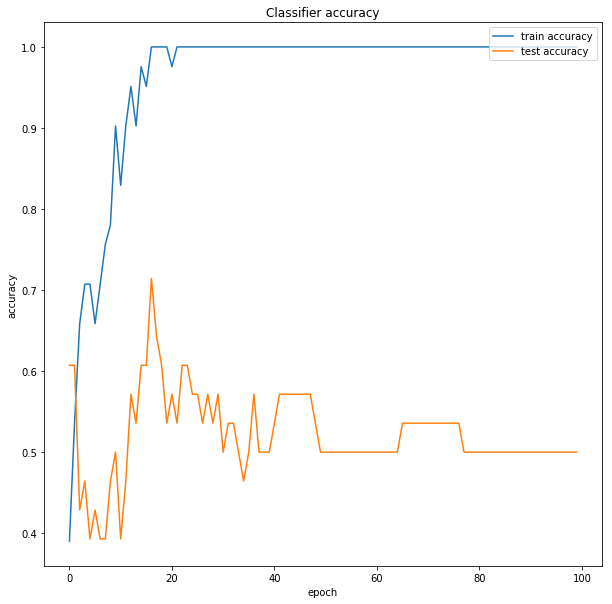

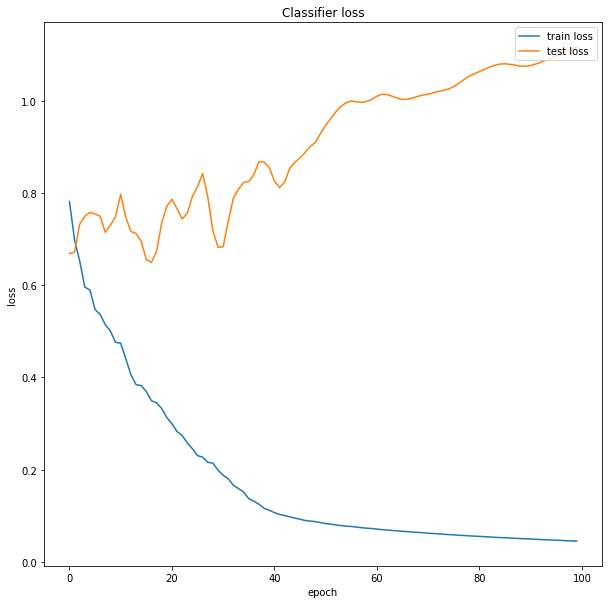

In [338]:
history = d
# summarize history for accuracy
plt.figure(figsize=(10,10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Classifier accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')
plt.show()

# summarize history for loss
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Classifier loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')
plt.show()

In [339]:
y_pred = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
[[6 2]
 [5 5]]
                  precision    recall  f1-score   support

   Schizophrenia       0.55      0.75      0.63         8
Bipolar Disorder       0.71      0.50      0.59        10

       micro avg       0.61      0.61      0.61        18
       macro avg       0.63      0.62      0.61        18
    weighted avg       0.64      0.61      0.61        18

Accuracy Score:  0.6111111111111112


In [221]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [ ]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test, y_hat)
names = ['Schizophrenia','Bipolar Disorder']
print_confusion_matrix(c,names

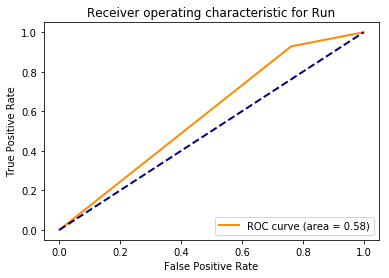

In [227]:
#plt.figure(figsize=(10,10))

fpr, tpr, _ = roc_curve(y_test, y_hat, pos_label=1)
roc_auc = auc(fpr, tpr)

lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Run')
plt.legend(loc="lower right")


plt.show()


# Taking an End-End Deep Learning Approach

1D CNN with 4 hidden layers, no Dropout.

In [340]:
import numpy as np
import torch
import torch.nn as nn
from torch.nn import Conv1d, AvgPool1d, BatchNorm1d, 
from torch.nn import 
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [ ]:
dataloader = DataLoader(dataset, batch_size=8, shuffle= True)
optim.Adadelta

In [ ]:
torch.nn.Conv1d

# Test Set Classification

In [136]:
X_scaled = minmax_scale(X_test, axis = 0, feature_range=(0, 1))
X_test = X_scaled
encoded_test = pd.DataFrame(encoder.predict(X_test))
encoded_test = encoded_test.add_prefix('feature_')

In [154]:
# Performing OLS on training set
model = sta.OLS(y_test, encoded_test.iloc[:,0:8].values)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diag_Code   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     383.0
Date:                Fri, 12 Jun 2020   Prob (F-statistic):             0.0395
Time:                        00:37:55   Log-Likelihood:                 30.123
No. Observations:                   9   AIC:                            -44.25
Df Residuals:                       1   BIC:                            -42.67
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            27.4711      0.844     32.549      0.0

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


## Note: 

only first 8 features \[0:7\] from the test set are required to perform prediction.

By looking at the OLS Regression results it seems like 100% variablity can be explained using 
the following features > 

In [ ]:
feat = ['feature_0','feature_3', 'fea']

<Figure size 432x288 with 0 Axes>

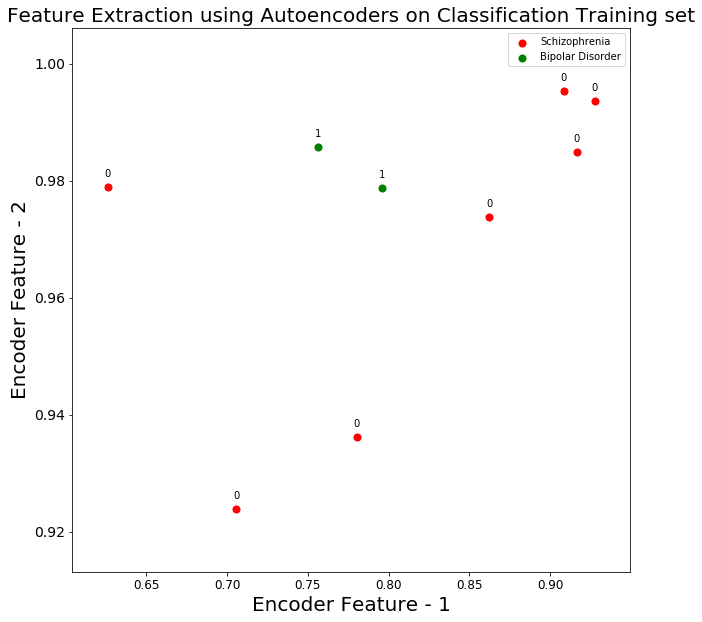

In [144]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Encoder Feature - 1',fontsize=20)
plt.ylabel('Encoder Feature - 2',fontsize=20)
plt.title("Feature Extraction using Autoencoders on Classification Training set",fontsize=20)


classes = ['Schizophrenia', 'Bipolar Disorder']
targets = [0, 1]
colors = ['r', 'g']

df_graph = encoded_test.iloc[:,7:10]
cols = df_graph.columns
y_graph = y_test.reset_index(drop = 'index')


for target, color, ind in zip(targets,colors, range(len(y_graph))):
    indicesToKeep = y_graph == target
    plt.scatter(df_graph.loc[indicesToKeep, cols[0]],
                df_graph.loc[indicesToKeep, cols[1]], c = color, s = 50)
    
df_annot = df_graph.values.tolist()     

for i, txt in enumerate(y_graph.tolist()):
    plt.annotate(str(txt), (df_annot[i][0],df_annot[i][1]), textcoords="offset points", xytext=(0,10), ha='center')
    
plt.legend(labels=classes)
plt.show()

In [87]:
# serialize model to JSON
model_json = autoencoder.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
autoencoder.save_weights("model_final.h5")
print("Saved model to disk")

Saved model to disk


In [57]:
from keras.backend import clear_session
clear_session()

In [ ]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

In [89]:
from ann_visualizer.visualize import ann_viz 

ann_viz(model, view=True, filename= 'Autoencoder Network.gv')

ModuleNotFoundError: No module named 'ann_visualizer'